In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
# Replace 'black_friday.csv' with your dataset path
df = pd.read_csv('data/train.csv')

# Preview data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [18]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [22]:
# Grouping by City_Category and Age
grouped_data = df.groupby(['City_Category', 'Age'])['Purchase'].mean().reset_index()

# Sorting to find top spenders
grouped_data_sorted = grouped_data.sort_values(by='Purchase', ascending=False)

# Display top spenders
print(grouped_data_sorted.head())

   City_Category    Age     Purchase
17             C  36-45  9882.012654
16             C  26-35  9835.388993
13             B    55+  9803.560635
19             C  51-55  9780.380806
15             C  18-25  9696.570919


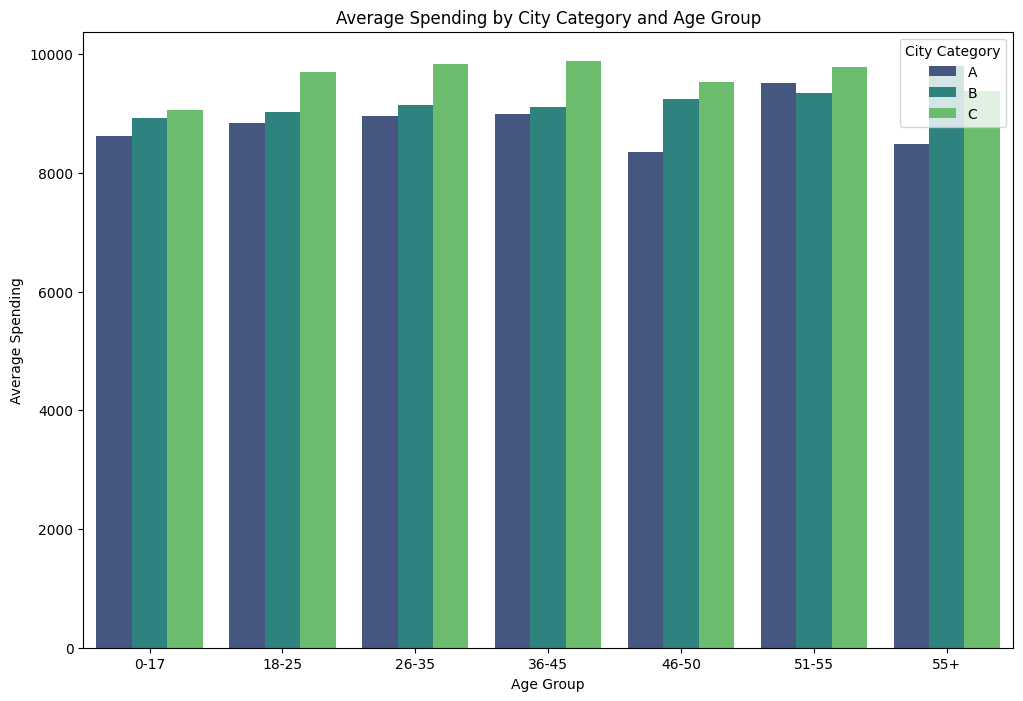

In [23]:
# Bar plot for spending by City_Category and Age
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Purchase', hue='City_Category', data=grouped_data, palette='viridis')
plt.title('Average Spending by City Category and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.legend(title='City Category')
plt.show()

In [26]:
top_spending_profile = grouped_data_sorted.iloc[0]
print("Highest Spending Profile:\n", top_spending_profile)

Highest Spending Profile:
 City_Category              C
Age                    36-45
Purchase         9882.012654
Name: 17, dtype: object


In [27]:
# Fill missing values with 0 (or use other strategies like mean or median)
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)

# Encoding Gender
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# Encode Age as ordinal values
age_mapping = {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}
df['Age'] = df['Age'].map(age_mapping)

# One-hot encode City_Category (optional for more interpretability)
df = pd.get_dummies(df, columns=['City_Category'], drop_first=True)

# Group by City_Category and Age to calculate average spending
grouped_data = df.groupby(['City_Category_B', 'City_Category_C', 'Age'])['Purchase'].mean().reset_index()

# Sort by spending
grouped_data_sorted = grouped_data.sort_values(by='Purchase', ascending=False)
print(grouped_data_sorted.head())

    City_Category_B  City_Category_C  Age     Purchase
10            False             True    4  9882.012654
9             False             True    3  9835.388993
20             True            False    7  9803.560635
12            False             True    6  9780.380806
8             False             True    2  9696.570919


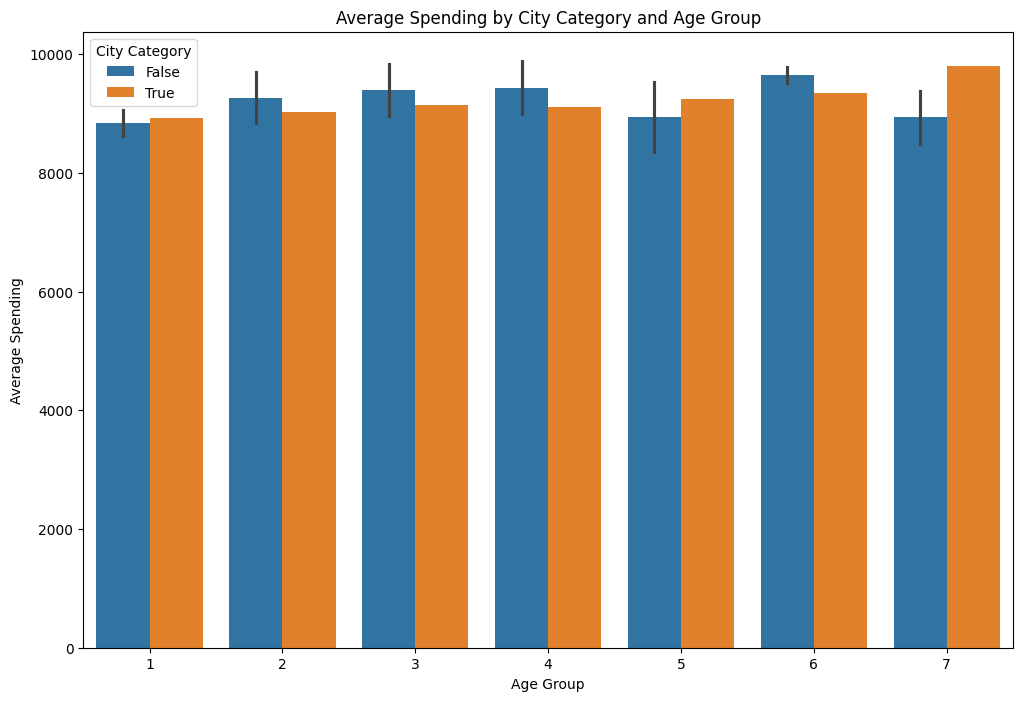

In [28]:
# Bar plot for spending by City and Age
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Purchase', hue='City_Category_B', data=grouped_data)
plt.title('Average Spending by City Category and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.legend(title='City Category')
plt.show()


T-Statistic: -15.632480195152612, P-Value: 4.540283045505333e-55
